## Using data provided create a model to predict house sales price

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import scale
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, log_loss
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor






## Read file and inspect data

In [2]:
houses = pd.read_csv('train.csv')
print(houses.head())
#houses.info()
i=0
lst= []
for col in houses :
    if sum(houses.ix[:,i].value_counts()) < 300 :
          lst.append(col)
    i= i+ 1
print(lst)
houses= houses.drop(lst, axis=1)
# houses.info()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [3]:
test_houses= pd.read_csv('test.csv')
#print(test_houses.head())
#test_houses.info()
i=0
test_lst= []
for col in test_houses :
    if sum(test_houses.ix[:,i].value_counts()) < 1000 :
          test_lst.append(col)
    i= i+ 1
print(test_lst)
test_houses= test_houses.drop(lst, axis=1)
# test_houses.info()

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [4]:
data_numeric= houses.select_dtypes([np.number])
data_numeric['LotFrontage']= data_numeric['LotFrontage'].fillna(np.mean(data_numeric['LotFrontage']))
data_numeric['MasVnrArea']= data_numeric['MasVnrArea'].fillna(np.mean(data_numeric['MasVnrArea']))
data_numeric['GarageYrBlt']= data_numeric['GarageYrBlt'].fillna(0)
data_numeric.info()

data_nonnumeric= houses.select_dtypes([np.object])
# print(data_nonnumeric)

    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
test_data_numeric= test_houses.select_dtypes([np.number])
test_data_numeric['LotFrontage']= test_data_numeric['LotFrontage'].fillna(np.mean(data_numeric['LotFrontage']))
test_data_numeric['MasVnrArea']= test_data_numeric['MasVnrArea'].fillna(np.mean(data_numeric['MasVnrArea']))
test_data_numeric[['GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']]= test_data_numeric[['GarageYrBlt', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']].fillna(0)
test_data_numeric.info()

test_data_nonnumeric= test_houses.select_dtypes([np.object])
# print(data_nonnumeric)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1459 non-null float64
BsmtFinSF1       1459 non-null float64
BsmtFinSF2       1459 non-null float64
BsmtUnfSF        1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1459 non-null float64
BsmtHalfBath     1459 non-null float64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-

## Visual evaluation of numeric data

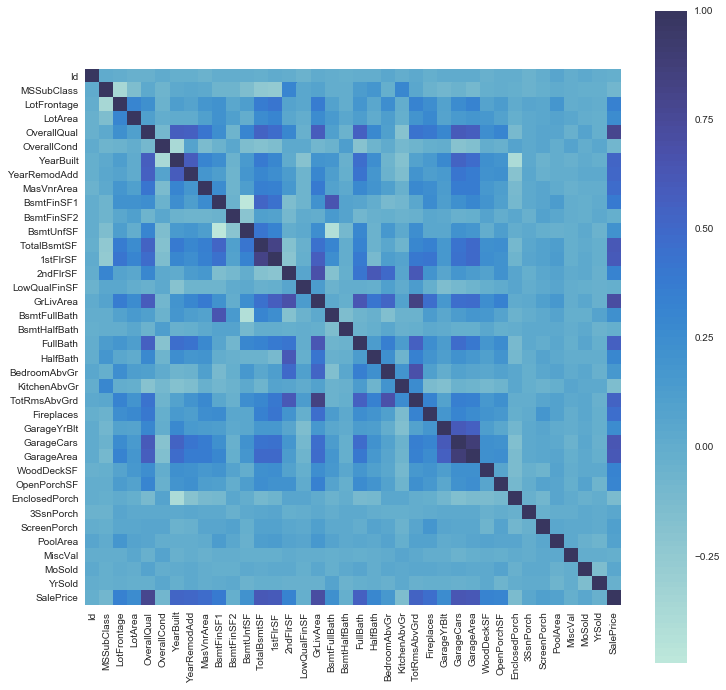

In [6]:
# data_for_plot= data_numeric.copy()
# imp= Imputer()
# imp.fit(data_for_plot)
# data_for_plot= imp.transform(data_for_plot)
# data_plot =pd.DataFrame(data_for_plot, columns=data_numeric.columns.values)
cm = data_numeric.corr()
plt.figure(figsize = (12,12))
sns.heatmap(cm, square=True, center=1.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

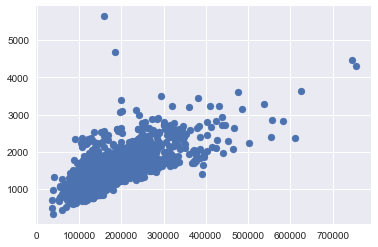

In [7]:
plt.scatter(data_numeric['SalePrice'], data_numeric['GrLivArea'])
plt.show()

1461.5


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


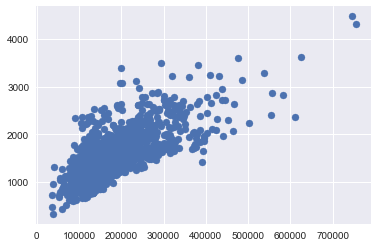

In [8]:
median = data_numeric.loc[data_numeric['GrLivArea']< 4500, 'GrLivArea'].median()
print(median)
data_numeric.loc[data_numeric.GrLivArea > 4500, 'GrLivArea'] = np.nan
data_numeric.fillna(median,inplace=True)

plt.scatter(data_numeric['SalePrice'], data_numeric['GrLivArea'])
plt.show()

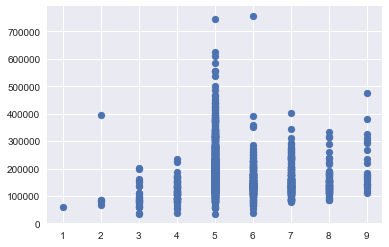

In [9]:
plt.scatter(data_numeric['OverallCond'], data_numeric['SalePrice'])
plt.show()

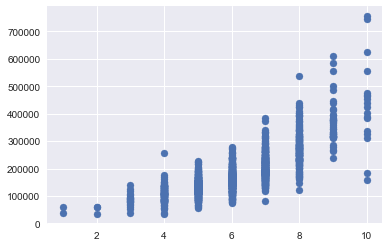

In [10]:
plt.scatter(data_numeric['OverallQual'], data_numeric['SalePrice'])
plt.show()

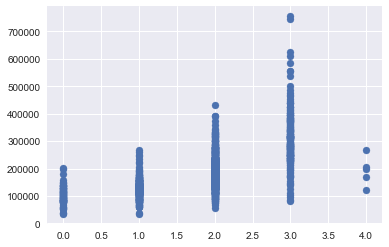

In [11]:
plt.scatter(data_numeric['GarageCars'], data_numeric['SalePrice'])
plt.show()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


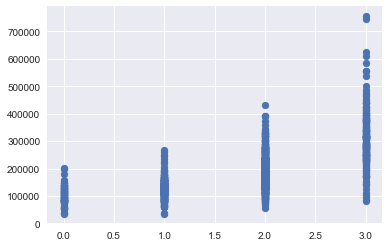

In [12]:
median = data_numeric.loc[data_numeric['GarageCars']< 3, 'GarageCars'].median()
# print(median)
data_numeric.loc[data_numeric.GarageCars > 3, 'GarageCars'] = np.nan
data_numeric.fillna(median,inplace=True)

plt.scatter(data_numeric['GarageCars'], data_numeric['SalePrice'])
plt.show()

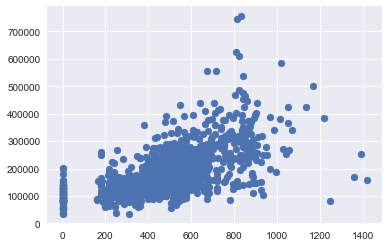

In [13]:
plt.scatter(data_numeric['GarageArea'], data_numeric['SalePrice'])
plt.show()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


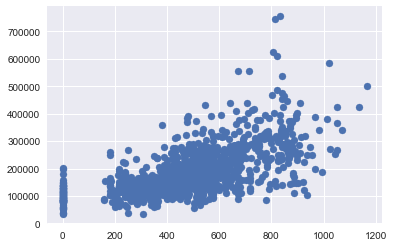

In [14]:
median = data_numeric.loc[data_numeric['GarageArea']< 1200, 'GarageArea'].median()
# print(median)
data_numeric.loc[data_numeric.GarageArea > 1200, 'GarageArea'] = np.nan
data_numeric.fillna(median,inplace=True)

plt.scatter(data_numeric['GarageArea'], data_numeric['SalePrice'])
plt.show()

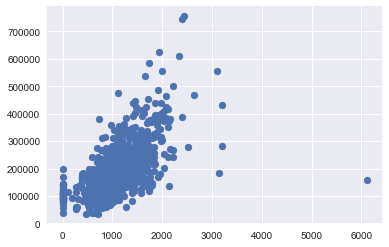

In [15]:
plt.scatter(data_numeric['TotalBsmtSF'], data_numeric['SalePrice'])
plt.show()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


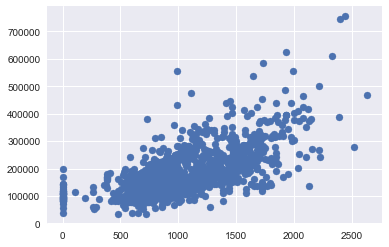

In [16]:
median = data_numeric.loc[data_numeric['TotalBsmtSF']< 3000, 'TotalBsmtSF'].median()
data_numeric.loc[data_numeric.TotalBsmtSF > 3000, 'TotalBsmtSF'] = np.nan
data_numeric.fillna(median,inplace=True)

plt.scatter(data_numeric['TotalBsmtSF'], data_numeric['SalePrice'])
plt.show()

## Perform modeling with numeric data only-
## set up variables for modeling

In [17]:
X = data_numeric.drop(['SalePrice'], axis=1).values
y = data_numeric['SalePrice'].values
print(X.shape, y.shape)

(1460, 37) (1460,)


In [18]:
test_X = test_data_numeric.values
# test_y = test_data_numeric.values
print(test_X.shape)

(1459, 37)


## Ridge regression on numeric data, alpha 0.1

In [19]:
pl= Pipeline([('clf', Ridge(alpha=0.1, normalize=True))])
# pl= Pipeline([('imp', Imputer()),('clf', OneVsRestClassifier(Ridge(alpha=0.1, normalize=True)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)

y_pred= pl.predict(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of logreg {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of logreg, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))

test_y_pred= pl.predict(test_X)
print(test_y_pred)




Score of logreg 0.8473971459021107
Cross_Val Score of logreg, [0.83308385 0.83197167 0.79538049 0.8657468  0.86529157]
Mean of Cross_val score: 0.8382948743151257
[126363.275223   157813.83885694 184477.35251427 ... 183923.10338152
 117465.41508068 254526.65955466]


## Ridge regression on numeric data, alpha 0.2

In [20]:
pl= Pipeline([('clf', Ridge(alpha=0.2, normalize=True))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)

y_pred= pl.predict(X_test)
# predictions= pl.predict_proba(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of logreg {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of logreg, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))
# print('log loss for logreg, {}'.format(log_loss(y_test, predictions)))


test_y_pred= pl.predict(test_X)
print(test_y_pred)

Score of logreg 0.8440516513472238
Cross_Val Score of logreg, [0.83429932 0.83381707 0.78984924 0.88367923 0.862853  ]
Mean of Cross_val score: 0.8408995708122614
[125622.09683261 159630.6085667  185724.49016802 ... 187604.33726571
 114370.94603905 251259.24612043]


## Lasso regression on numeric data, alpha 5

In [21]:
#Use Lasso regression on just numeric data, shrinks coef of less important data to 0

pl= Pipeline([('clf', Lasso(alpha=5, normalize=True))])
# pl= Pipeline([('imp', Imputer()),('clf', OneVsRestClassifier(Lasso(alpha=0.1, normalize=True)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)

y_pred= pl.predict(X_test)
# predictions= pl.predict_proba(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of logreg {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of logreg, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))
# print('log loss for logreg, {}'.format(log_loss(y_test, predictions)))


test_y_pred= pl.predict(test_X)
print(test_y_pred)

Score of logreg 0.8477290126240984
Cross_Val Score of logreg, [0.825706   0.8235133  0.79824668 0.82932191 0.86393071]
Mean of Cross_val score: 0.8281437182067029
[125224.16047774 163189.05076832 183993.92786764 ... 181385.92425778
 122983.40600019 257666.54846576]


## Lasso regression on numeric data, alpha 7

In [22]:
#Use Lasso regression on just numeric data, shrinks coef of less important data to 0

pl= Pipeline([('clf', Lasso(alpha=7, normalize=True))])
# pl= Pipeline([('imp', Imputer()),('clf', OneVsRestClassifier(Ridge(alpha=0.1, normalize=True)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)
# mse= mean_squared_error(y_pred, y_test)

y_pred= pl.predict(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of logreg {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of logreg, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

# test_y_pred= pl.predict(test_X)
# print(test_y_pred)

Score of logreg 0.8477168664008095
Cross_Val Score of logreg, [0.82665989 0.82362834 0.79871173 0.83131207 0.86440905]
Mean of Cross_val score: 0.8289442139003034
30676.556755471298


## Plot lasso coeficients, verify which features affect the sales price the most

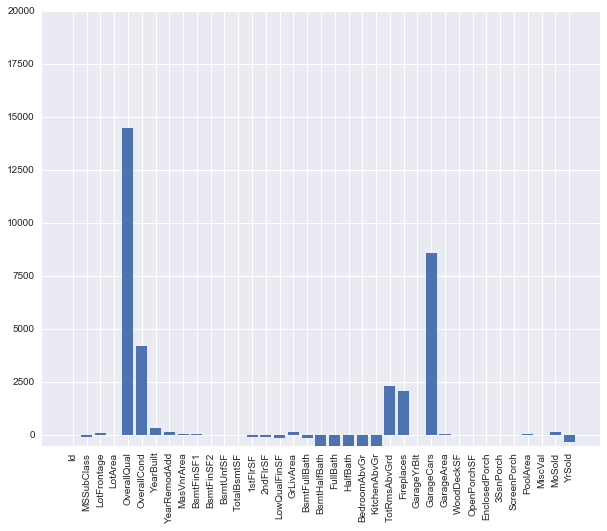

In [23]:
names = data_numeric.drop(['SalePrice'], axis=1).columns
# print(names)
lasso= Lasso(alpha=3, normalize=True)
lasso_coef= lasso.fit(X_train, y_train).coef_
# print(lasso_coef)
plt.figure(figsize = (10,8))
plt.bar(range(len(names)), lasso_coef)
plt.ylim(-500, 20000)
plt.xticks(range(len(names)), names, rotation=90)
plt.show()

## Address missing data in non_numeric columns

In [24]:
data_nonnumeric = data_nonnumeric.fillna('')
print(data_nonnumeric.head())

  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2      ...      KitchenQual Functional  \
0      CollgCr       Norm       Norm      ...               Gd        Typ   
1      Veenker      Feedr       Norm      ...               TA        Typ   
2      CollgCr       Norm       Norm      ...               Gd        Typ   
3      Crawfor       Norm       Norm      ...               Gd        Typ   
4      NoRidge       Norm       Norm      ...               Gd        Typ   

  FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0                 Attchd      

In [25]:
test_data_nonnumeric = test_data_nonnumeric.fillna('')
print(test_data_nonnumeric.head())

  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2      ...      KitchenQual Functional  \
0        NAmes      Feedr       Norm      ...               TA        Typ   
1        NAmes       Norm       Norm      ...               Gd        Typ   
2      Gilbert       Norm       Norm      ...               TA        Typ   
3      Gilbert       Norm       Norm      ...               Gd        Typ   
4      StoneBr       Norm       Norm      ...               Gd        Typ   

  FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0                 Attchd      

## create dummy variables for non-numeric columns, merge numeric and non-numeric data frames

In [26]:
#create dummy variables for text columns then concat numeric and non_numeric dataframes
dummies= pd.get_dummies(data_nonnumeric, prefix_sep='_')
# print(dummies.head())
# dummies.info()
dummies_col= list(dummies.columns.values)
print(len(dummies_col))
houses_both = pd.concat([data_numeric, dummies], axis = 1)
houses_both.info()
# print(houses_both.head())
print(len(houses_both.columns))



251
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 289 entries, Id to SaleCondition_Partial
dtypes: float64(7), int64(31), uint8(251)
memory usage: 791.4 KB
289


In [27]:
#create dummy variables for text columns then concat numeric and non_numeric dataframes
test_dummies= pd.get_dummies(test_data_nonnumeric, prefix_sep='_')
# print(test_dummies.head())
# test_dummies.info()
test_dummies_col= list(test_dummies.columns.values)
print(len(test_dummies_col))

test_houses_both = pd.concat([test_data_numeric, test_dummies], axis = 1)
test_houses_both.info()
# print(test_houses_both.head())
print(len(test_houses_both.columns))

diff = [item for item in dummies_col if item not in test_dummies_col]
diff1 = [item for item in test_dummies_col if item not in dummies_col]
print(diff, diff1)

houses_both= houses_both.drop(diff, axis=1)
test_houses_both= test_houses_both.drop(diff1, axis=1)
print(test_houses_both.head())

241
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 278 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(26), uint8(241)
memory usage: 765.2 KB
278
['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_', 'Electrical_Mix', 'GarageQual_Ex'] ['MSZoning_', 'Utilities_', 'Exterior1st_', 'Exterior2nd_', 'KitchenQual_', 'Functional_', 'SaleType_']
     Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120  

## set up variables for modeling

In [28]:
X = houses_both.drop(['SalePrice'], axis=1).values
y = houses_both['SalePrice'].values
print(X.shape, y.shape)


(1460, 271) (1460,)


In [29]:
test_X = test_houses_both.values
print(test_X.shape)


(1459, 271)


## lasso regression modeling of complete data set, alpha 5

In [30]:
#Use Lasso regression, shrinks coef of less important data to 0

pl= Pipeline([('clf', Lasso(alpha=5, normalize=True))])
# pl= Pipeline([('imp', Imputer()),('clf', OneVsRestClassifier(Lasso(alpha=0.1, normalize=True)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)

y_pred= pl.predict(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of lasso {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of lasso, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)
test_y_pred= pl.predict(test_X)
print(test_y_pred)


Score of lasso 0.9010201365539454
Cross_Val Score of lasso, [0.69887522 0.7523009  0.79978421 0.54751049 0.63718657]
Mean of Cross_val score: 0.6871314795216831
24731.70935008458
[114619.8867836  162143.58849192 191529.87253002 ... 170031.6225218
 116676.8617528  223149.92105058]


## lasso regression modeling of complete data set, alpha 7

In [31]:
#Use Lasso regression, shrinks coef of less important data to 0

pl= Pipeline([('clf', Lasso(alpha=7, normalize=True))])
# pl= Pipeline([('imp', Imputer()),('clf', OneVsRestClassifier(Lasso(alpha=0.1, normalize=True)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)

y_pred= pl.predict(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of lasso {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of lasso, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)
test_y_pred= pl.predict(test_X)
print(test_y_pred)


Score of lasso 0.9009625857977475
Cross_Val Score of lasso, [0.75085781 0.79882241 0.79966381 0.60319567 0.70308441]
Mean of Cross_val score: 0.7311248239440634
24738.898295851155
[115021.57688543 163183.15156526 191235.17731752 ... 166598.07146587
 115810.85144681 223051.83794264]


## lasso regression modeling of complete data set, alpha 11

In [32]:
#Use Lasso regression, shrinks coef of less important data to 0

pl= Pipeline([('clf', Lasso(alpha=7, normalize=True))])
# pl= Pipeline([('imp', Imputer()),('clf', OneVsRestClassifier(Lasso(alpha=0.1, normalize=True)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)

y_pred= pl.predict(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

# print('Test set predicitons: \n {}'.format(y_pred))
print('Score of lasso {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of lasso, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)
test_y_pred= pl.predict(test_X)
print(test_y_pred)


Score of lasso 0.9009625857977475
Cross_Val Score of lasso, [0.75085781 0.79882241 0.79966381 0.60319567 0.70308441]
Mean of Cross_val score: 0.7311248239440634
24738.898295851155
[115021.57688543 163183.15156526 191235.17731752 ... 166598.07146587
 115810.85144681 223051.83794264]


In [35]:
#Use Gradient 

# pl= Pipeline([('clf', ensemble.GradientBoostingRegressor(n_estimators=1000, max_depth=3, learning_rate=0.1))])
pl= Pipeline([('clf', ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.05))])

# pl= Pipeline([('imp', Imputer()),('clf', OneVsRestClassifier(Lasso(alpha=0.1, normalize=True)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)
y_pred= pl.predict(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

#print('Test set predicitons: \n {}'.format(y_pred))
print('Score of grad_boost {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of grad_boost, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)
test_y_pred= pd.DataFrame(pl.predict(test_X))
# print(test_y_pred)
test_houses_both['SalePrice']= test_y_pred
test_saleprice= test_houses_both[['Id','SalePrice']]
# print(test_saleprice)
test_saleprice.to_csv('test_saleprice_3.csv', encoding='utf-8', index=False)


Score of grad_boost 0.9198842850448965
Cross_Val Score of grad_boost, [0.88298617 0.93295555 0.89629964 0.88797378 0.82129111]
Mean of Cross_val score: 0.8843012521319501
22250.489268344634


In [34]:
#Use Random Forest
#default settings
pl= Pipeline([('clf', RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, 
                                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                            max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                            bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                                            warm_start=False))])
# pl= Pipeline([('clf', RandomForestRegressor(n_estimators=15, criterion='mse', max_depth=3, min_samples_split=2, 
#                                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
#                                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#                                             bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
#                                             warm_start=False))])

# pl= Pipeline([('imp', Imputer()),('clf', OneVsRestClassifier(Lasso(alpha=0.1, normalize=True)))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)
y_pred= pl.predict(X_test)

cv_results= cross_val_score(pl, X_test, y_test, cv=5)

#print('Test set predicitons: \n {}'.format(y_pred))
print('Score of random forest {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of random forest, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)
test_y_pred= pl.predict(test_X)
print(test_y_pred)


Score of random forest 0.8659913459988131
Cross_Val Score of random forest, [0.85508583 0.91661428 0.83640268 0.87358054 0.85041052]
Mean of Cross_val score: 0.8664187709676261
28777.10698458814
[126000.  153465.  185690.  ... 163095.  112072.5 213850. ]
